# Retrieval Augmented Generation

LLMs are already powerful at various tasks.

<div style="text-align: center;">
    <img src="images/llms-are-great.png" width="50%"></img>
</div>

RAG (Retrieval-Augmented Generation) aims to enhance LLMs by integrating external knowledge,<br> thereby reducing **hallucinations** and improving **domain adaptation**. <br>RAG can also be a much quicker solution to implement than fine-tuning an LLM on specific data.

<div style="text-align: center;">
    <img src="images/rag-overview.png" width="30%"></img>
</div>


## Key Components

1. **Retrieval**: Accessing relevant information from external databases or sources to enrich the response.
2. **Augmented**: Combining the retrieved data with the language model's generation capabilities for more informed and contextually accurate answers.
3. **Generation**: Producing coherent and contextually relevant text based on both the retrieved information and inherent language patterns.

<div style="text-align: center;">
    <img src="images/rag-workflow.png" width="50%"></img>
</div>

## RAG Use Case Example

Very recent news:
<div style="text-align: center;">
    <img src="images/news-example.png" width="40%"></img>
    <figcaption>https://www.khabaronline.ir/news/2135095/ثبت-جهانی-سه-روستای-ایرانی-در-سال-۲۰۲۵-از-حرا-تا-البرز-آشنایی</figcaption>
</div>

Asking `chatgpt4o-mini` (uses web search):
<div style="text-align: center;">
    <img src="images/chatgpt4o-mini-websearch.png" width="40%"></img>
</div>

Asking `gemma3-4b`:
<div style="text-align: center;">
    <img src="images/gemma3-4b-rag.png" width="65%"></img>
</div>

Improving `gemma3-4b` by adding context:
<div style="text-align: center;">
    <img src="images/gemma3-4b-improved-with-rag.png" width="65%"></img>
</div>

## Why We Need Local LLMs?
+ Privacy and Data Security
+ Control and Customization
+ Independence from External Providers
+ Avoiding Subscription Fees

## Large Language Models

+ Models that have been trained on a **vast** amount of textual data to **understand and generate** natural language.
+ Learn linguistic knowledge by predicting the next token in a sentence.

<div style="text-align: center;">
    <img src="images/llm-next-token-prediction.png" width="45%"></img>
    <figcaption>Image source: https://neo4j.com/essential-graphrag/</figcaption>
</div>

General Structure:
+ Pretraining: Initial training on general data (books, web, Wikipedia, etc.)
+ Fine-tuning: Adjustments for specific tasks (chat, summarization, translation, etc.)
+ Inference: Utilization for responding to new inputs

<div style="text-align: center;">
    <img src="images/llm-life-cycle.png" width="50%"></img>
    <figcaption>Image source: Build a Large Language Model (From Scratch)
</figcaption>
</div>


## LLM Limitations

### Knowledge Cuttoff / Outdated information

knowledge cutoff date refers to the most recent point at
which the model’s training data includes information.

<div style="text-align: center;">
    <img src="images/knowledge-cutoff.png" width="50%"></img>
    <figcaption>https://huggingface.co/google/gemma-3-270m-it</figcaption>
</div>

In [39]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("text-generation", model="google/gemma-3-270m-it")
messages = [
    {"role": "user", "content": "Who is the president of united states?"},
]
pipe(messages)

Device set to use cuda:0


[{'generated_text': [{'role': 'user',
    'content': 'Who is the president of united states?'},
   {'role': 'assistant',
    'content': 'The current president of the United States is Joe Biden.'}]}]

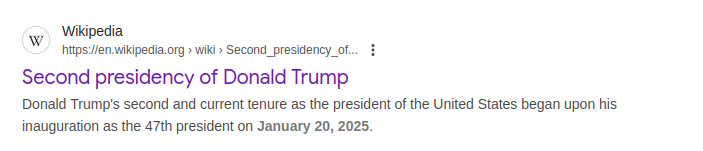

### Hallucinations
LLMs tendency to provide assertive, confident answers—even when those answers contain incorrect or fabricated information.

In [41]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("text-generation", model="google/gemma-3-270m-it")
messages = [
    {"role": "user", "content": "What is the WikiData id of Ali Daei?"},
]
pipe(messages)

Device set to use cuda:0


[{'generated_text': [{'role': 'user',
    'content': 'What is the WikiData id of Ali Daei?'},
   {'role': 'assistant',
    'content': 'The WikiData ID for Ali Daei is 18422.\n'}]}]

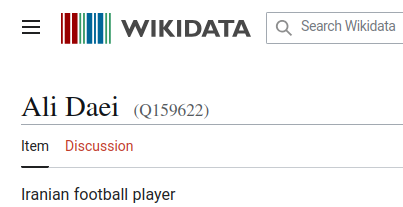
<figcaption>https://www.wikidata.org/wiki/Q159622</figcaption>

<br>

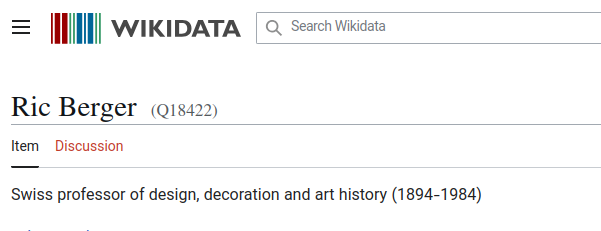

<figcaption>https://www.wikidata.org/wiki/Q18422</figcaption>


### Lack of private information
LLMs are unaware of events or information not included in their training dataset.

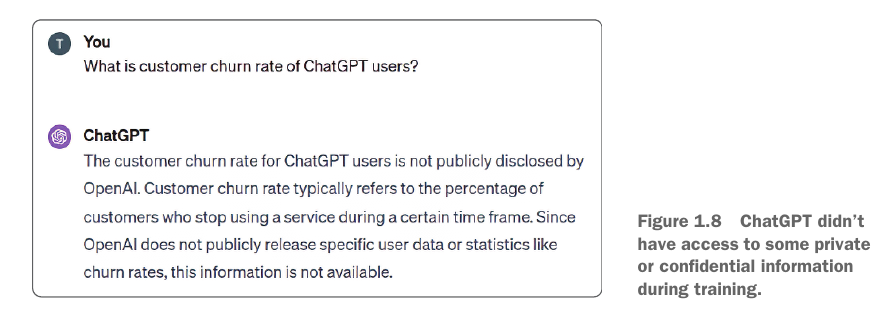

# Overcoming the Limitations of LLMs

## Supervised finetuning

+ Requires vast amount of labled datasets.
+ Complex, costly and time consuming.
+ Not feasible for continuous updating.

<div style="text-align: center;">
    <img src="images/gemma3-12b-finetuning.png" width="70%"></img>
    <figcaption>https://huggingface.co/spaces/hf-accelerate/model-memory-usage</figcaption>
</div>

## Retrieval-augmented generation

+ Instead of depending on an LLM’s internal knowledge, relevant facts or information are provided directly in the input prompt (Lewis et al., 2020).
+ LLMs are great at understanding natural language and following instructions in the prompt.

In [4]:
# Use a pipeline as a high-level helper
from ollama import chat
from ollama import ChatResponse

# Define context
context = (
    "Donald Trump's second and current tenure as the President of the United States "
    "began upon his inauguration as the 47th president on January 20, 2025."
)

# Define the question
question = "Who is the president of the United States?"

# Create the prompt structured for RAG
prompt = f"""
Question:
{question}

Answer the question based on the following text:
{context}
"""

response: ChatResponse = chat(model='gemma3:270m', messages=[
  {"role": "user", "content": prompt}
])

print(response.message.content)

The answer is **Donald Trump**.



+ RAG uses the LLM’s strengths in understanding and generating natural language, while factual information is supplied in
the prompt, reducing dependence on the LLM’s internal knowledge base and consequently hallucinations.
+ In the RAG workflow, the goal shifts to task-oriented response generation, where LLMs follow a set of instructions.

<div style="text-align: center;">
    <img src="images/rag-workflow.png" width="50%"></img>
</div>

### References

<div style="text-align: center;">
    <img src="images/essential-graphrag.png" width="30%"></img>
    <figcaption>https://neo4j.com/essential-graphrag/</figcaption>
</div>